In [4]:
from traceback import print_tb

import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from rn_keras import RnKeras


In [5]:
# Extração de pixels
width = 128
height = 128
directory_path = './homer_bart_1'
files = [os.path.join(directory_path, f) for f in sorted(os.listdir(directory_path))]
images = []
classes = []

In [6]:
for image_path in files:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # cv2.imshow('estudos', image)
    # cv2.waitKey(0)
    image = image.ravel()
    images.append(image)
    name_image = os.path.basename(os.path.normpath(image_path))
    classes.append(0 if name_image.startswith('b') else 1)



In [7]:
X = np.asarray(images)
Y = np.asarray(classes)

# Normalização dos pixels
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

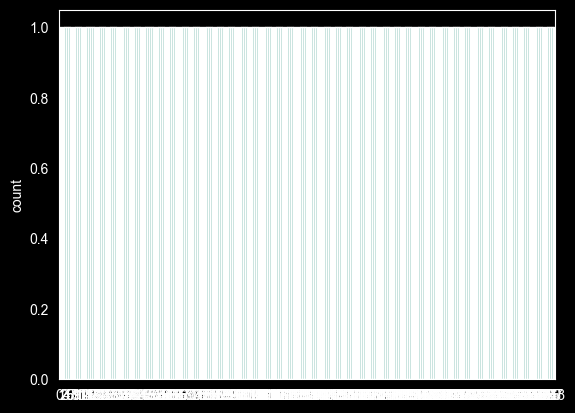

(array([0, 1]), array([160, 109]))
1.0000000000000002 0.0
1.0000000000000002 0.0
(215, 16384)
(54, 16384)
(215,)
(54,)


In [8]:
sns.countplot(classes)
plt.show()
print(np.unique(Y, return_counts=True))
print(X[0].max(), X[0].min())
print(X.max(), X.min())
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [9]:
rnKeras = RnKeras()

model, history = rnKeras.load_nr()
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,151,825 (2.25 GB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402,767,884 (1.50 GB)

None


<Sequential name=sequential, built=True>
{'accuracy': [0.5, 0.46000000834465027, 0.5799999833106995, 0.46000000834465027, 0.5799999833106995], 'loss': [220.00900268554688, 46.621238708496094, 3.719167470932007, 2.8253023624420166, 0.8828708529472351]}


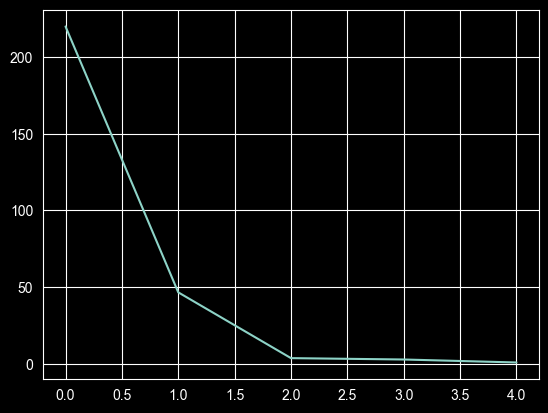

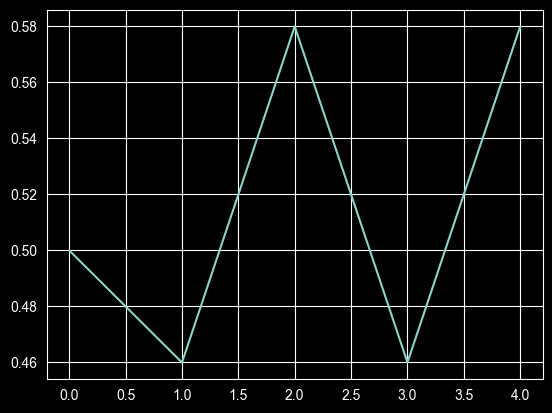

In [10]:
print(model)
print(history)
plt.plot(history['loss'])
plt.show()
plt.plot(history['accuracy'])
plt.show()

In [11]:
previsions = model.predict(X_test)
previsions = (previsions > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


0.48148148148148145


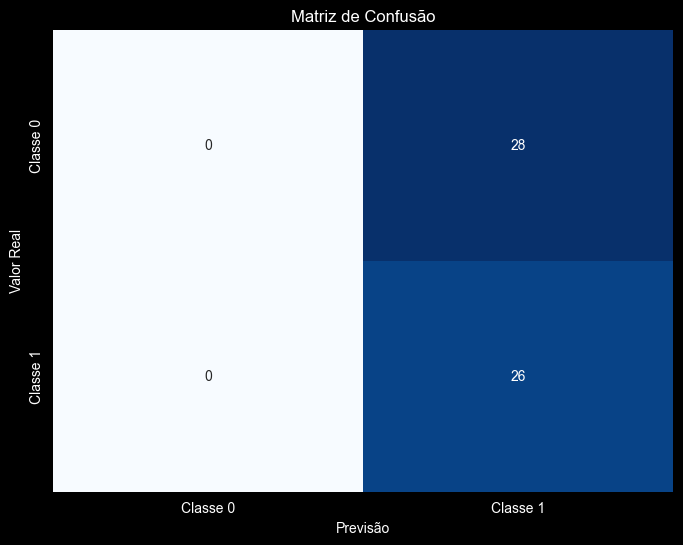

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.48      1.00      0.65        26

    accuracy                           0.48        54
   macro avg       0.24      0.50      0.33        54
weighted avg       0.23      0.48      0.31        54



C:\Users\soste\AppData\Local\pypoetry\Cache\virtualenvs\curso-4-1-visao-computacional-guia-complet-w7ZThdhu-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\soste\AppData\Local\pypoetry\Cache\virtualenvs\curso-4-1-visao-computacional-guia-complet-w7ZThdhu-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\soste\AppData\Local\pypoetry\Cache\virtualenvs\curso-4-1-visao-computacional-guia-complet-w7ZThdhu-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1833

In [12]:
score = accuracy_score(Y_test, previsions)
print(score)
cm = confusion_matrix(Y_test, previsions)

# Criar o heatmap usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()

print(classification_report(Y_test, previsions))

In [13]:
print(X_test[0], Y_test[0])
print(X_test[0].shape)

[1. 1. 1. ... 1. 1. 1.] 0
(16384,)


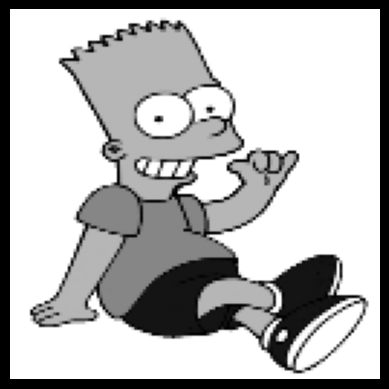

In [17]:
# cv2.imshow("", X_test[0].reshape(128, 128))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(X_test[0].reshape(128, 128), cmap='gray') # cmap='gray' se for preto e branco
plt.axis('off') # Remove os eixos com números
plt.show()